In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import tensorflow as tf
from google.colab import drive

# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Graphing imports
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# file path
file_path = '/content/drive/My Drive/Career_Materials/Course_Work/OSU_Data_Analytics/Module_23_Project_4/Student_performance_data_.csv'

#  Import and read the charity_data.csv.
import pandas as pd
student_data_df = pd.read_csv(file_path)
student_data_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Drop the non-beneficial columns, 'STUDENTID'.
student_data_df = student_data_df.drop(columns=['StudentID'])

In [ ]:
# Determine the number of unique values in each column.
student_data_df.nunique()

,0
Age,4
Gender,2
Ethnicity,4
ParentalEducation,5
StudyTimeWeekly,2392
Absences,30
Tutoring,2
ParentalSupport,5
Extracurricular,2
Sports,2


In [ ]:
# Display the student data
student_data_df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Show the columns
student_data_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [ ]:
# Split our preprocessed data into our features and target arrays
target = student_data_df['GradeClass']
features = student_data_df.drop(columns=['GradeClass'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=78)

In [ ]:
# Note that our first

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 8
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.])

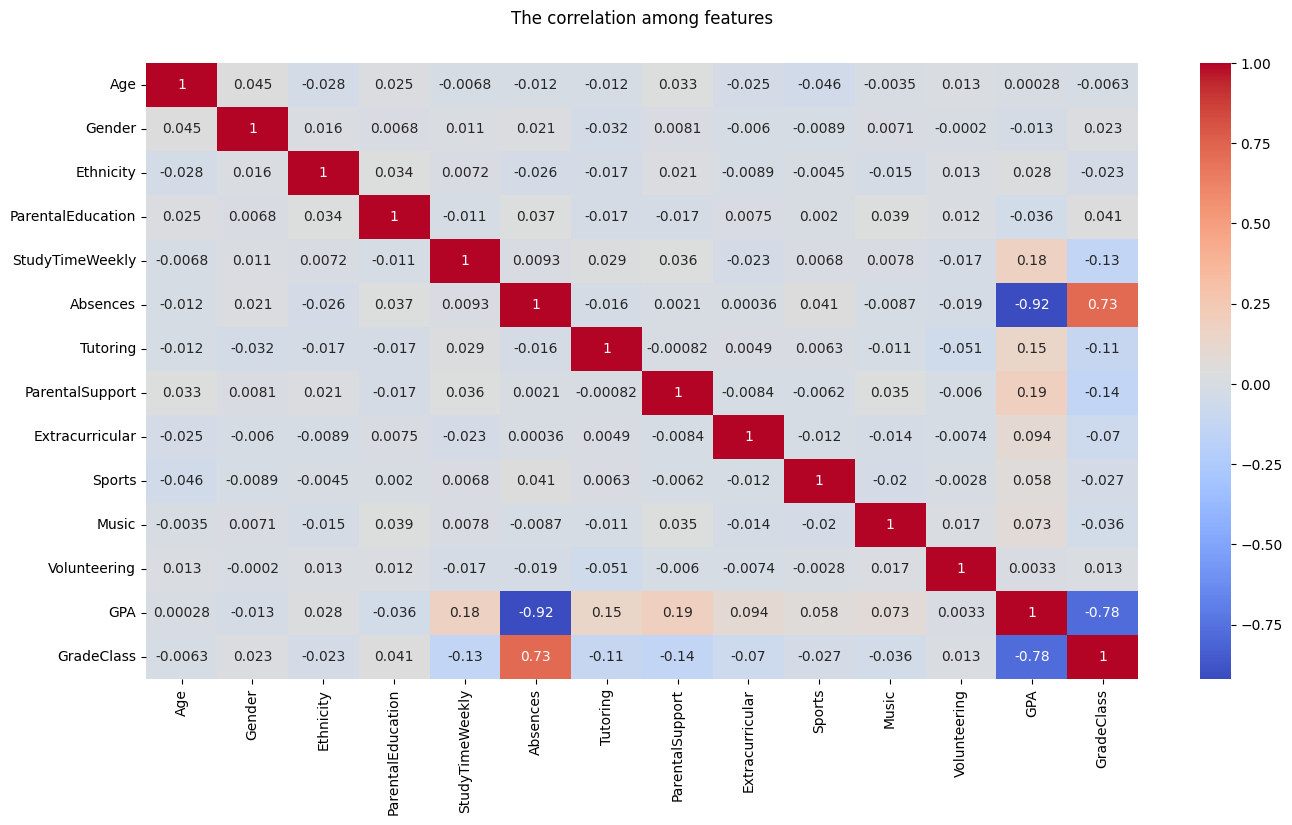

In [ ]:
# Ploting our heat map
plt.figure(figsize=(16, 8))
sns.heatmap(student_data_df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)

# Show the graph
plt.show()

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=13))

# # second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=8, activation="softmax"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 200)                 │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           6,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,496 (37.09 KB)

 Trainable params: 9,496 (37.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=75,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_split=.2,
)

Epoch 1/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4293 - loss: 0.6264 - val_accuracy: 0.4856 - val_loss: 0.3353
Epoch 2/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5418 - loss: 0.2825 - val_accuracy: 0.6397 - val_loss: 0.2187
Epoch 3/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6642 - loss: 0.2137 - val_accuracy: 0.6606 - val_loss: 0.2001
Epoch 4/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 0.1815 - val_accuracy: 0.6736 - val_loss: 0.1915
Epoch 5/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7265 - loss: 0.1768 - val_accuracy: 0.6841 - val_loss: 0.1859
Epoch 6/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7375 - loss: 0.1729 - val_accuracy: 0.7180 - val_loss: 0.1812
Epoch 7/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.1604 - val_accuracy: 0.7102 - val_loss: 0.1757
Epoch 8/75
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.1522 - val_accuracy: 0.7363 - val_loss:

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - 3ms/step - accuracy: 0.8225 - loss: 0.1586
Loss: 0.15864308178424835, Accuracy: 0.8225469589233398


In [ ]:
# Export our model to HDF5 file
nn.save("higher_education_performance_eval_model.h5")

In [ ]:
# Download the model
from google.colab import files
files.download('higher_education_performance_eval_model.h5')

# Model Optimization
- In many of our earlier attempts, we started with fewer layers, various activation functions, and different percentages on our training data
- We initially had our model at somewhere around 76% accuracy.
- With some experimentation, we were able to improve our model up to 82% by adjusting the layers and training percentage.